In [1]:
import pandas as pd

from src import data_io, eda, qc, mlflow_utils

In [2]:
features = data_io.load_data(source="local", fmt="csv",path="../data/raw/walmart/features.csv", parse_dates=False)
stores = data_io.load_data(path="../data/raw/walmart/stores.csv", parse_dates=False,cache=False)
train = data_io.load_data(path="../data/raw/walmart/train.csv",parse_dates=False, cache=False)
test = data_io.load_data(path="../data/raw/walmart/test.csv", parse_dates=False, cache=False)

In [3]:
df = train.merge(stores, on="Store", how="inner")
df = df.merge(features, on=["Store","Date"], how="inner")

In [4]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.310001,2.572,NaN,NaN,NaN,NaN,NaN,211.096359,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.509998,2.548,NaN,NaN,NaN,NaN,NaN,211.242172,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.930000,2.514,NaN,NaN,NaN,NaN,NaN,211.289139,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.630001,2.561,NaN,NaN,NaN,NaN,NaN,211.319641,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.500000,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

In [6]:
df.drop(columns=["IsHoliday_x"], inplace=True)
df.rename(columns={"IsHoliday_y":"IsHoliday"},inplace=True)

In [7]:
df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,2010-02-05,24924.50,A,151315,42.310001,2.572,NaN,NaN,NaN,NaN,NaN,211.096359,8.106,False
1,1,1,2010-02-12,46039.49,A,151315,38.509998,2.548,NaN,NaN,NaN,NaN,NaN,211.242172,8.106,True
2,1,1,2010-02-19,41595.55,A,151315,39.930000,2.514,NaN,NaN,NaN,NaN,NaN,211.289139,8.106,False
3,1,1,2010-02-26,19403.54,A,151315,46.630001,2.561,NaN,NaN,NaN,NaN,NaN,211.319641,8.106,False
4,1,1,2010-03-05,21827.90,A,151315,46.500000,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
df.groupby(by="Store")["Weekly_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Store,,,,,,,,
1,10244.0,21710.543621,27748.945511,-863.00,3465.6225,10289.375,31452.9575,203670.47
2,10238.0,26898.070031,33077.612059,-1098.00,5216.8550,14333.530,34697.3775,285353.53
3,9036.0,6373.033983,14251.034807,-1008.96,1014.2450,2804.815,7158.2950,155897.94
4,10272.0,29161.210415,34583.677814,-898.00,5914.9050,15116.810,40686.6525,385051.04
5,8999.0,5053.415813,8068.221050,-101.26,920.2550,2582.660,6359.4450,93517.72
6,10211.0,21913.243624,23633.427075,-698.00,4780.5000,13637.840,32601.9050,342578.65
7,9762.0,8358.766148,10679.008085,-459.00,1261.3400,4575.240,11676.0350,222921.09
8,9895.0,13133.014768,15132.069598,-100.00,2501.6200,7164.160,19082.3200,153431.69
9,8867.0,8772.890379,12446.502614,-496.00,1609.6100,4205.470,11633.4800,139427.43


## There are negatif Weekly_Sales data. Is it possible ? Is there any problem probably

In [12]:
df.loc[df.Weekly_Sales < 0].groupby("Store")["Weekly_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Store,,,,,,,,
1,15.0,-263.861333,262.707698,-863.00,-398.0000,-198.000,-54.0000,-1.27
2,22.0,-214.296364,376.459859,-1098.00,-156.0000,-30.940,-4.5400,-0.98
3,9.0,-132.311111,329.587837,-1008.96,-36.0000,-12.970,-7.4800,-3.50
4,5.0,-263.184000,373.357991,-898.00,-298.0000,-88.000,-31.0000,-0.92
5,21.0,-20.514762,25.618310,-101.26,-22.0000,-8.000,-6.8800,-1.00
6,21.0,-117.033333,163.869787,-698.00,-197.0000,-50.000,-10.5000,-0.20
7,22.0,-55.485000,122.529345,-459.00,-23.1475,-11.975,-7.0000,-0.66
8,11.0,-29.867273,29.327552,-100.00,-40.0600,-26.000,-8.4800,-2.00
9,32.0,-60.822812,114.261356,-496.00,-41.8500,-15.000,-5.1400,-0.97


In [13]:
df

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,2010-02-05,24924.50,A,151315,42.310001,2.572,NaN,NaN,NaN,NaN,NaN,211.096359,8.106,False
1,1,1,2010-02-12,46039.49,A,151315,38.509998,2.548,NaN,NaN,NaN,NaN,NaN,211.242172,8.106,True
2,1,1,2010-02-19,41595.55,A,151315,39.930000,2.514,NaN,NaN,NaN,NaN,NaN,211.289139,8.106,False
3,1,1,2010-02-26,19403.54,A,151315,46.630001,2.561,NaN,NaN,NaN,NaN,NaN,211.319641,8.106,False
4,1,1,2010-03-05,21827.90,A,151315,46.500000,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,B,118221,64.879997,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013565,8.684,False
421566,45,98,2012-10-05,628.10,B,118221,64.889999,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170410,8.667,False
421567,45,98,2012-10-12,1061.02,B,118221,54.470001,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327271,8.667,False
421568,45,98,2012-10-19,760.01,B,118221,56.470001,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330856,8.667,False


In [15]:
df["Date"] = pd.to_datetime(df.Date)

In [16]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfYear'] = df['Date'].dt.dayofyear
df['WeekOfMonth'] = (df['Date'].dt.day - 1) // 7 + 1

<Axes: xlabel='Week', ylabel='Weekly_Sales'>

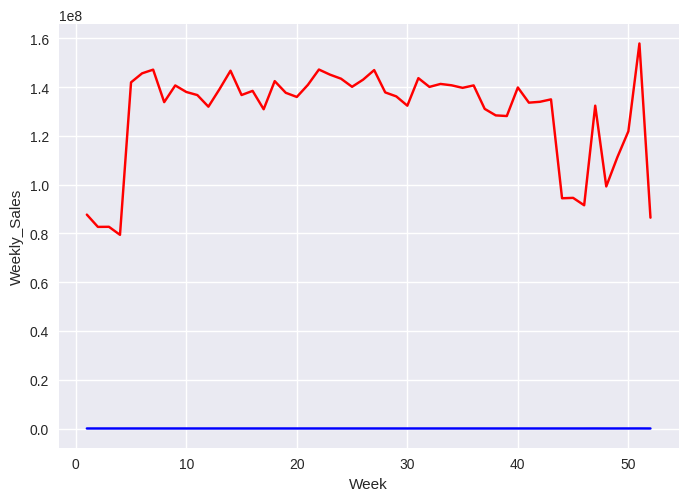

In [20]:
df_weeks_sum = df.groupby("Week")["Weekly_Sales"].sum()
df_weeks_avg = df.groupby("Week")["Weekly_Sales"].mean()
import seaborn as sbn

sbn.lineplot(x = df_weeks_sum.index, y = df_weeks_sum,color="red")
sbn.lineplot(x = df_weeks_avg.index, y = df_weeks_avg,color="blue")

<Axes: xlabel='Month', ylabel='Weekly_Sales'>

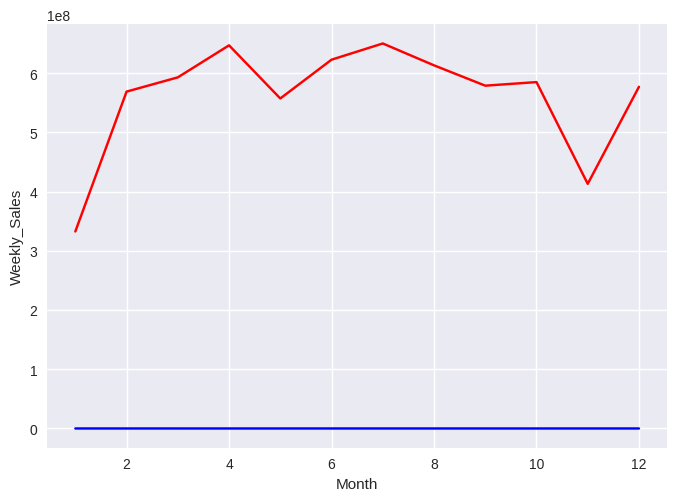

In [24]:
df_months_sum = df.groupby("Month")["Weekly_Sales"].sum()
df_months_avg = df.groupby("Month")["Weekly_Sales"].mean()
import seaborn as sbn

sbn.lineplot(x = df_months_sum.index, y = df_months_sum,color="red")
sbn.lineplot(x = df_months_avg.index, y = df_months_avg,color="blue")

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

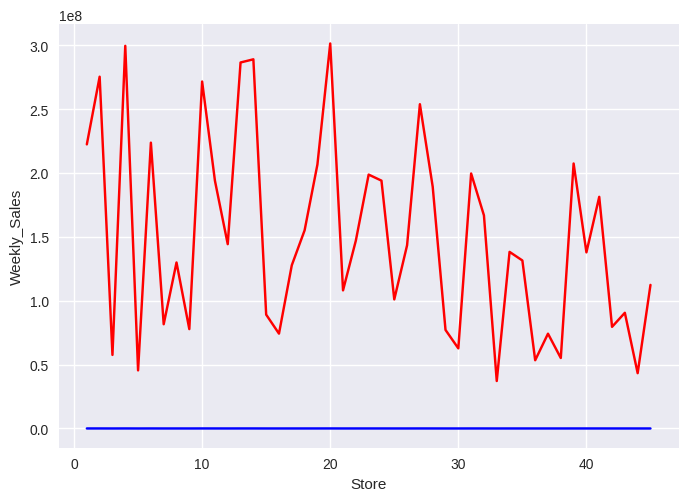

In [23]:
df_stores_sum = df.groupby("Store")["Weekly_Sales"].sum()
df_stores_avg = df.groupby("Store")["Weekly_Sales"].mean()
import seaborn as sbn

sbn.lineplot(x = df_stores_sum.index, y = df_stores_sum,color="red")
sbn.lineplot(x = df_stores_avg.index, y = df_stores_avg,color="blue")

<Axes: xlabel='Year', ylabel='Weekly_Sales'>

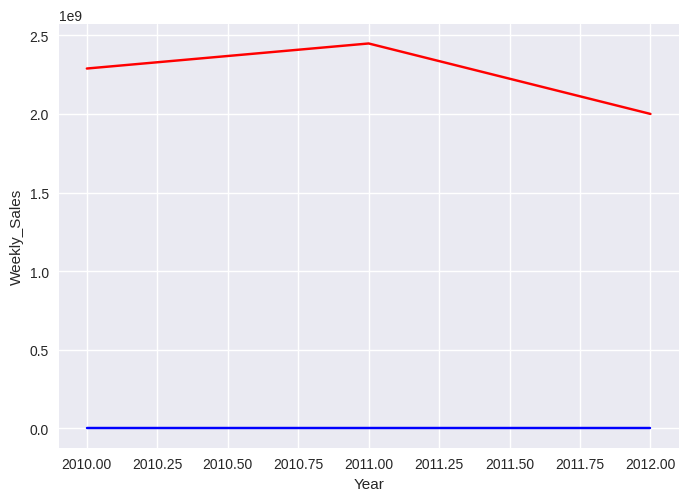

In [25]:
df_year_sum = df.groupby("Year")["Weekly_Sales"].sum()
df_year_avg = df.groupby("Year")["Weekly_Sales"].mean()
import seaborn as sbn

sbn.lineplot(x = df_year_sum.index, y = df_year_sum,color="red")
sbn.lineplot(x = df_year_avg.index, y = df_year_avg,color="blue")

In [27]:
df.loc[df.Weekly_Sales < 0].groupby("Year").size()

Year
2010    390
2011    483
2012    412
dtype: int64

In [28]:
df.loc[df.Weekly_Sales < 0].groupby(by=["Year","Month"]).size()

Year  Month
2010  2        28
      3        33
      4        36
      5        47
      6        44
      7        31
      8        21
      9        39
      10       29
      11       29
      12       53
2011  1        42
      2        25
      3        45
      4        37
      5        43
      6        54
      7        44
      8        38
      9        51
      10       24
      11       28
      12       52
2012  1        43
      2        26
      3        35
      4        40
      5        60
      6        60
      7        32
      8        51
      9        34
      10       31
dtype: int64

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

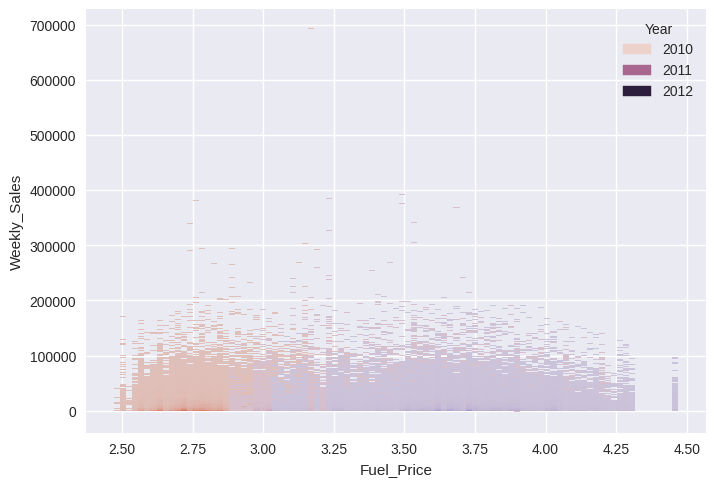

In [36]:
sbn.histplot(x="Fuel_Price",y="Weekly_Sales",data=df,hue="Year")

In [39]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month',
       'Quarter', 'Week', 'DayOfWeek', 'DayOfYear', 'WeekOfMonth'],
      dtype='object')

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

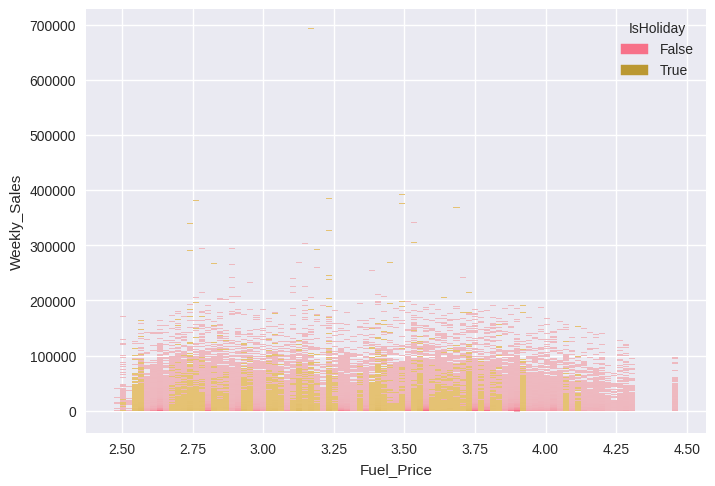

In [40]:
sbn.histplot(x="Fuel_Price",y="Weekly_Sales",data=df,hue="IsHoliday")

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

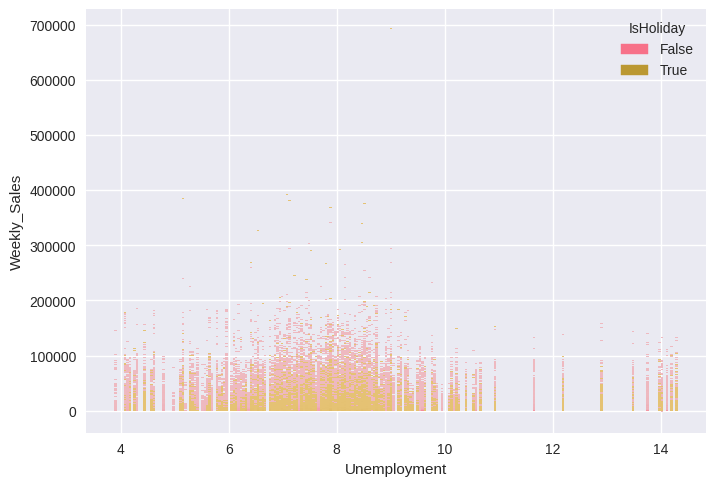

In [42]:
sbn.histplot(x="Unemployment",y="Weekly_Sales",data=df,hue="IsHoliday")

In [43]:
# Analyze date range in the dataset
print("Date range in dataset:")
print(f"Start date: {df['Date'].min()}")
print(f"End date: {df['Date'].max()}")
print(f"Years: {sorted(df['Year'].unique())}")
print(f"Total unique dates: {df['Date'].nunique()}")

Date range in dataset:
Start date: 2010-02-05 00:00:00
End date: 2012-10-26 00:00:00
Years: [np.int32(2010), np.int32(2011), np.int32(2012)]
Total unique dates: 143


In [44]:
import pandas as pd
from datetime import datetime, timedelta
import calendar

def get_us_holidays(year):
    """
    Returns a dictionary of U.S. holidays and special retail days for a given year.
    """
    holidays = {}
    
    # Fixed date holidays
    holidays[f'{year}-01-01'] = 'New Year\'s Day'
    holidays[f'{year}-02-14'] = 'Valentine\'s Day'
    holidays[f'{year}-07-04'] = 'Independence Day'
    holidays[f'{year}-10-31'] = 'Halloween'
    holidays[f'{year}-11-11'] = 'Veterans Day'
    holidays[f'{year}-12-24'] = 'Christmas Eve'
    holidays[f'{year}-12-25'] = 'Christmas Day'
    holidays[f'{year}-12-31'] = 'New Year\'s Eve'
    
    # Martin Luther King Jr. Day - 3rd Monday in January
    jan_first = datetime(year, 1, 1)
    days_to_first_monday = (7 - jan_first.weekday()) % 7
    first_monday = jan_first + timedelta(days=days_to_first_monday)
    mlk_day = first_monday + timedelta(days=14)  # 3rd Monday
    holidays[mlk_day.strftime('%Y-%m-%d')] = 'Martin Luther King Jr. Day'
    
    # Presidents' Day - 3rd Monday in February
    feb_first = datetime(year, 2, 1)
    days_to_first_monday = (7 - feb_first.weekday()) % 7
    first_monday = feb_first + timedelta(days=days_to_first_monday)
    presidents_day = first_monday + timedelta(days=14)  # 3rd Monday
    holidays[presidents_day.strftime('%Y-%m-%d')] = 'Presidents\' Day'
    
    # Easter Sunday calculation (Western Easter)
    def easter_date(year):
        # Using the algorithm for Western Easter
        a = year % 19
        b = year // 100
        c = year % 100
        d = b // 4
        e = b % 4
        f = (b + 8) // 25
        g = (b - f + 1) // 3
        h = (19 * a + b - d - g + 15) % 30
        i = c // 4
        k = c % 4
        l = (32 + 2 * e + 2 * i - h - k) % 7
        m = (a + 11 * h + 22 * l) // 451
        month = (h + l - 7 * m + 114) // 31
        day = ((h + l - 7 * m + 114) % 31) + 1
        return datetime(year, month, day)
    
    easter = easter_date(year)
    holidays[easter.strftime('%Y-%m-%d')] = 'Easter Sunday'
    
    # Mother's Day - 2nd Sunday in May
    may_first = datetime(year, 5, 1)
    days_to_first_sunday = (6 - may_first.weekday()) % 7
    first_sunday = may_first + timedelta(days=days_to_first_sunday)
    mothers_day = first_sunday + timedelta(days=7)  # 2nd Sunday
    holidays[mothers_day.strftime('%Y-%m-%d')] = 'Mother\'s Day'
    
    # Memorial Day - Last Monday in May
    may_last = datetime(year, 5, 31)
    days_back_to_monday = (may_last.weekday() + 1) % 7
    memorial_day = may_last - timedelta(days=days_back_to_monday)
    holidays[memorial_day.strftime('%Y-%m-%d')] = 'Memorial Day'
    
    # Father's Day - 3rd Sunday in June
    june_first = datetime(year, 6, 1)
    days_to_first_sunday = (6 - june_first.weekday()) % 7
    first_sunday = june_first + timedelta(days=days_to_first_sunday)
    fathers_day = first_sunday + timedelta(days=14)  # 3rd Sunday
    holidays[fathers_day.strftime('%Y-%m-%d')] = 'Father\'s Day'
    
    # Labor Day - 1st Monday in September
    sep_first = datetime(year, 9, 1)
    days_to_first_monday = (7 - sep_first.weekday()) % 7
    labor_day = sep_first + timedelta(days=days_to_first_monday)
    holidays[labor_day.strftime('%Y-%m-%d')] = 'Labor Day'
    
    # Columbus Day - 2nd Monday in October
    oct_first = datetime(year, 10, 1)
    days_to_first_monday = (7 - oct_first.weekday()) % 7
    first_monday = oct_first + timedelta(days=days_to_first_monday)
    columbus_day = first_monday + timedelta(days=7)  # 2nd Monday
    holidays[columbus_day.strftime('%Y-%m-%d')] = 'Columbus Day'
    
    # Thanksgiving - 4th Thursday in November
    nov_first = datetime(year, 11, 1)
    days_to_first_thursday = (3 - nov_first.weekday()) % 7
    first_thursday = nov_first + timedelta(days=days_to_first_thursday)
    thanksgiving = first_thursday + timedelta(days=21)  # 4th Thursday
    holidays[thanksgiving.strftime('%Y-%m-%d')] = 'Thanksgiving'
    
    # Black Friday - Day after Thanksgiving
    black_friday = thanksgiving + timedelta(days=1)
    holidays[black_friday.strftime('%Y-%m-%d')] = 'Black Friday'
    
    # Cyber Monday - Monday after Thanksgiving
    cyber_monday = thanksgiving + timedelta(days=4)
    holidays[cyber_monday.strftime('%Y-%m-%d')] = 'Cyber Monday'
    
    return holidays

# Create holiday dictionary for all years in dataset
all_holidays = {}
for year in [2010, 2011, 2012]:
    year_holidays = get_us_holidays(year)
    all_holidays.update(year_holidays)

print(f"Generated {len(all_holidays)} holidays for years 2010-2012")
print("\\nSample holidays:")
for i, (date, holiday) in enumerate(list(all_holidays.items())[:10]):
    print(f"{date}: {holiday}")
print("...")

Generated 57 holidays for years 2010-2012
\nSample holidays:
2010-01-01: New Year's Day
2010-02-14: Valentine's Day
2010-07-04: Independence Day
2010-10-31: Halloween
2010-11-11: Veterans Day
2010-12-24: Christmas Eve
2010-12-25: Christmas Day
2010-12-31: New Year's Eve
2010-01-18: Martin Luther King Jr. Day
2010-02-15: Presidents' Day
...


In [45]:
# Add holiday identification columns to the dataframe
df['Date_str'] = df['Date'].dt.strftime('%Y-%m-%d')
df['IsUSHoliday'] = df['Date_str'].map(all_holidays).notna()
df['HolidayName'] = df['Date_str'].map(all_holidays)

# Create specific hoekl olarak superbowl wekk labor day gibi şeylerei de ekledik mi ?
# type columnsa
federal_holidays = [
    'New Year\'s Day', 'Martin Luther King Jr. Day', 'Presidents\' Day',
    'Memorial Day', 'Independence Day', 'Labor Day', 'Columbus Day',
    'Veterans Day', 'Thanksgiving', 'Christmas Day'
]

retail_events = [
    'Valentine\'s Day', 'Easter Sunday', 'Mother\'s Day', 'Father\'s Day',
    'Halloween', 'Black Friday', 'Cyber Monday', 'Christmas Eve', 'New Year\'s Eve'
]

df['IsFederalHoliday'] = df['HolidayName'].isin(federal_holidays)
df['IsRetailEvent'] = df['HolidayName'].isin(retail_events)

# Clean up temporary column
df.drop('Date_str', axis=1, inplace=True)

print("Holiday columns added to dataframe!")
print(f"Total holidays identified: {df['IsUSHoliday'].sum()}")
print(f"Federal holidays: {df['IsFederalHoliday'].sum()}")
print(f"Retail events: {df['IsRetailEvent'].sum()}")
print(f"Comparison with existing IsHoliday: {df['IsHoliday'].sum()}")

Holiday columns added to dataframe!
Total holidays identified: 14823
Federal holidays: 2965
Retail events: 11858
Comparison with existing IsHoliday: 29661


In [46]:
# Validate and explore holiday identification results
print("=== HOLIDAY IDENTIFICATION VALIDATION ===\\n")

# Show unique holidays identified in the dataset
holiday_summary = df[df['IsUSHoliday']].groupby(['HolidayName']).agg({
    'Date': ['min', 'max', 'count'],
    'Weekly_Sales': 'mean'
}).round(2)
holiday_summary.columns = ['First_Date', 'Last_Date', 'Occurrences', 'Avg_Weekly_Sales']
print("Holidays identified in dataset:")
print(holiday_summary)

print("\\n=== COMPARISON WITH EXISTING ISHOLIDAY COLUMN ===")
comparison = pd.crosstab(df['IsHoliday'], df['IsUSHoliday'], margins=True)
print(comparison)

# Show which holidays match between original and new identification
print("\\n=== SAMPLE DATES WITH HOLIDAY INFORMATION ===")
sample_holidays = df[df['IsUSHoliday']].groupby('HolidayName').first()[['Date', 'IsHoliday', 'IsFederalHoliday', 'IsRetailEvent']].head(10)
print(sample_holidays)

# Show weekly sales differences for holidays
print("\\n=== WEEKLY SALES BY HOLIDAY TYPE ===")
sales_comparison = df.groupby(['IsUSHoliday', 'IsFederalHoliday', 'IsRetailEvent'])['Weekly_Sales'].agg(['mean', 'std', 'count']).round(2)
print(sales_comparison)

=== HOLIDAY IDENTIFICATION VALIDATION ===\n
Holidays identified in dataset:
               First_Date  Last_Date  Occurrences  Avg_Weekly_Sales
HolidayName                                                        
Black Friday   2010-11-26 2011-11-25         5959          22220.94
Christmas Eve  2010-12-24 2010-12-24         2956          27378.69
New Year's Eve 2010-12-31 2010-12-31         2943          13738.54
Veterans Day   2011-11-11 2011-11-11         2965          16348.81
\n=== COMPARISON WITH EXISTING ISHOLIDAY COLUMN ===
IsUSHoliday   False   True     All
IsHoliday                         
False        385988   5921  391909
True          20759   8902   29661
All          406747  14823  421570
\n=== SAMPLE DATES WITH HOLIDAY INFORMATION ===
                     Date  IsHoliday  IsFederalHoliday  IsRetailEvent
HolidayName                                                          
Black Friday   2010-11-26       True             False           True
Christmas Eve  2010-12-24      

In [47]:
# Display updated dataframe structure
print("=== UPDATED DATAFRAME COLUMNS ===")
print("New holiday-related columns added:")
holiday_columns = ['IsUSHoliday', 'HolidayName', 'IsFederalHoliday', 'IsRetailEvent']
for col in holiday_columns:
    print(f"- {col}: {df[col].dtype}")

print(f"\\nDataframe shape: {df.shape}")
print(f"All columns: {list(df.columns)}")

# Show sample of data with holiday information
print("\\n=== SAMPLE DATA WITH HOLIDAY INFORMATION ===")
holiday_sample = df[df['IsUSHoliday']].head(5)[['Date', 'Store', 'Weekly_Sales', 'IsHoliday', 'IsUSHoliday', 'HolidayName', 'IsFederalHoliday', 'IsRetailEvent']]
print(holiday_sample)

=== UPDATED DATAFRAME COLUMNS ===
New holiday-related columns added:
- IsUSHoliday: bool
- HolidayName: object
- IsFederalHoliday: bool
- IsRetailEvent: bool
\nDataframe shape: (421570, 27)
All columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month', 'Quarter', 'Week', 'DayOfWeek', 'DayOfYear', 'WeekOfMonth', 'IsUSHoliday', 'HolidayName', 'IsFederalHoliday', 'IsRetailEvent']
\n=== SAMPLE DATA WITH HOLIDAY INFORMATION ===
         Date  Store  Weekly_Sales  IsHoliday  IsUSHoliday     HolidayName  \
42 2010-11-26      1      18820.29       True         True    Black Friday   
46 2010-12-24      1      55931.23      False         True   Christmas Eve   
47 2010-12-31      1      19124.58       True         True  New Year's Eve   
92 2011-11-11      1      18689.54      False         True    Veterans Day   
94 2011-11-25      1      20

In [48]:
# Add additional major U.S. cultural and retail events
def get_additional_events(year):
    """
    Returns additional major U.S. events that impact retail sales
    """
    additional_events = {}
    
    # Super Bowl Sunday - First Sunday in February
    feb_first = datetime(year, 2, 1)
    days_to_first_sunday = (6 - feb_first.weekday()) % 7
    super_bowl_sunday = feb_first + timedelta(days=days_to_first_sunday)
    additional_events[super_bowl_sunday.strftime('%Y-%m-%d')] = 'Super Bowl Sunday'
    
    # Back to School period - typically last week of August / first week of September
    # Using last Monday of August as Back to School reference
    aug_last = datetime(year, 8, 31)
    days_back_to_monday = (aug_last.weekday() + 1) % 7
    back_to_school = aug_last - timedelta(days=days_back_to_monday)
    additional_events[back_to_school.strftime('%Y-%m-%d')] = 'Back to School Week'
    
    # Tax Day - April 15th (or next business day if weekend)
    tax_day = datetime(year, 4, 15)
    # If weekend, move to next Monday
    if tax_day.weekday() >= 5:  # Saturday or Sunday
        days_to_monday = 7 - tax_day.weekday()
        tax_day = tax_day + timedelta(days=days_to_monday)
    additional_events[tax_day.strftime('%Y-%m-%d')] = 'Tax Day'
    
    # Cinco de Mayo
    additional_events[f'{year}-05-05'] = 'Cinco de Mayo'
    
    # St. Patrick's Day
    additional_events[f'{year}-03-17'] = 'St. Patrick\'s Day'
    
    # Graduation season - typically second Saturday in June
    june_first = datetime(year, 6, 1)
    days_to_first_saturday = (5 - june_first.weekday()) % 7
    first_saturday = june_first + timedelta(days=days_to_first_saturday)
    graduation_day = first_saturday + timedelta(days=7)  # 2nd Saturday
    additional_events[graduation_day.strftime('%Y-%m-%d')] = 'Graduation Season'
    
    # Start of Summer season - Memorial Day weekend is already covered
    # End of Summer - Labor Day weekend is already covered
    
    return additional_events

# Add additional events to the holiday dictionary
print("Adding additional cultural and retail events...")
for year in [2010, 2011, 2012]:
    additional = get_additional_events(year)
    all_holidays.update(additional)
    print(f"Added {len(additional)} events for {year}")

print(f"\\nTotal events now: {len(all_holidays)}")

# Show some of the new events
new_events = ['Super Bowl Sunday', 'Back to School Week', 'Tax Day', 'Cinco de Mayo', 'St. Patrick\'s Day', 'Graduation Season']
print("\\nNew events added:")
for date, event in all_holidays.items():
    if event in new_events:
        print(f"{date}: {event}")

Adding additional cultural and retail events...
Added 6 events for 2010
Added 6 events for 2011
Added 6 events for 2012
\nTotal events now: 75
\nNew events added:
2010-02-07: Super Bowl Sunday
2010-08-29: Back to School Week
2010-04-15: Tax Day
2010-05-05: Cinco de Mayo
2010-03-17: St. Patrick's Day
2010-06-12: Graduation Season
2011-02-06: Super Bowl Sunday
2011-08-28: Back to School Week
2011-04-15: Tax Day
2011-05-05: Cinco de Mayo
2011-03-17: St. Patrick's Day
2011-06-11: Graduation Season
2012-02-05: Super Bowl Sunday
2012-08-26: Back to School Week
2012-04-16: Tax Day
2012-05-05: Cinco de Mayo
2012-03-17: St. Patrick's Day
2012-06-09: Graduation Season


In [49]:
# Update the dataframe with the additional events
df['Date_str'] = df['Date'].dt.strftime('%Y-%m-%d')
df['IsUSHoliday'] = df['Date_str'].map(all_holidays).notna()
df['HolidayName'] = df['Date_str'].map(all_holidays)

# Update holiday categories to include new events
federal_holidays = [
    'New Year\'s Day', 'Martin Luther King Jr. Day', 'Presidents\' Day',
    'Memorial Day', 'Independence Day', 'Labor Day', 'Columbus Day',
    'Veterans Day', 'Thanksgiving', 'Christmas Day'
]

retail_events = [
    'Valentine\'s Day', 'Easter Sunday', 'Mother\'s Day', 'Father\'s Day',
    'Halloween', 'Black Friday', 'Cyber Monday', 'Christmas Eve', 'New Year\'s Eve',
    'Back to School Week', 'Graduation Season'
]

cultural_events = [
    'Super Bowl Sunday', 'St. Patrick\'s Day', 'Tax Day', 'Cinco de Mayo'
]

df['IsFederalHoliday'] = df['HolidayName'].isin(federal_holidays)
df['IsRetailEvent'] = df['HolidayName'].isin(retail_events)
df['IsCulturalEvent'] = df['HolidayName'].isin(cultural_events)

# Clean up temporary column
df.drop('Date_str', axis=1, inplace=True)

print("Updated holiday identification with additional events!")
print(f"Total holidays/events identified: {df['IsUSHoliday'].sum()}")
print(f"Federal holidays: {df['IsFederalHoliday'].sum()}")
print(f"Retail events: {df['IsRetailEvent'].sum()}")
print(f"Cultural events: {df['IsCulturalEvent'].sum()}")

# Check if Labor Day is properly included
labor_day_check = df[df['HolidayName'] == 'Labor Day']['Date'].unique()
print(f"\\nLabor Day dates found: {labor_day_check}")

# Check Super Bowl dates
super_bowl_check = df[df['HolidayName'] == 'Super Bowl Sunday']['Date'].unique()
print(f"Super Bowl Sunday dates found: {super_bowl_check}")

Updated holiday identification with additional events!
Total holidays/events identified: 17776
Federal holidays: 2965
Retail events: 11858
Cultural events: 2953
\nLabor Day dates found: <DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]
Super Bowl Sunday dates found: <DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]


In [50]:
# Final comprehensive holiday summary
print("=== COMPREHENSIVE HOLIDAY SUMMARY ===\\n")

# Show all holidays by category
all_holiday_summary = df[df['IsUSHoliday']].groupby(['HolidayName']).agg({
    'Date': ['count'],
    'Weekly_Sales': 'mean',
    'IsFederalHoliday': 'first',
    'IsRetailEvent': 'first', 
    'IsCulturalEvent': 'first'
}).round(2)

all_holiday_summary.columns = ['Occurrences', 'Avg_Weekly_Sales', 'Federal', 'Retail', 'Cultural']
print("All holidays and events identified:")
print(all_holiday_summary.sort_values('Avg_Weekly_Sales', ascending=False))

print("\\n=== FINAL DATAFRAME INFO ===")
print(f"New columns added: IsUSHoliday, HolidayName, IsFederalHoliday, IsRetailEvent, IsCulturalEvent")
print(f"Total unique holidays/events: {df['HolidayName'].nunique()}")
print(f"Dataframe shape: {df.shape}")

# Show sample with all holiday information
print("\\n=== SAMPLE DATA WITH ALL HOLIDAY CATEGORIES ===")
sample = df[df['IsUSHoliday']].groupby('HolidayName').first()[['Date', 'IsFederalHoliday', 'IsRetailEvent', 'IsCulturalEvent', 'Weekly_Sales']].head(8)
print(sample)

=== COMPREHENSIVE HOLIDAY SUMMARY ===\n
All holidays and events identified:
                Occurrences  Avg_Weekly_Sales  Federal  Retail  Cultural
HolidayName                                                             
Christmas Eve          2956          27378.69    False    True     False
Black Friday           5959          22220.94    False    True     False
Veterans Day           2965          16348.81     True   False     False
Tax Day                2953          15229.71    False   False      True
New Year's Eve         2943          13738.54    False    True     False
\n=== FINAL DATAFRAME INFO ===
New columns added: IsUSHoliday, HolidayName, IsFederalHoliday, IsRetailEvent, IsCulturalEvent
Total unique holidays/events: 5
Dataframe shape: (421570, 28)
\n=== SAMPLE DATA WITH ALL HOLIDAY CATEGORIES ===
                     Date  IsFederalHoliday  IsRetailEvent  IsCulturalEvent  \
HolidayName                                                                   
Black Friday   201

In [54]:
df["sum_markdowns"] = df.MarkDown1 + df.MarkDown2 + df.MarkDown3 + df.MarkDown4 + df.MarkDown5
df[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]].fillna(0,inplace=True)

In [55]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month',
       'Quarter', 'Week', 'DayOfWeek', 'DayOfYear', 'WeekOfMonth',
       'IsUSHoliday', 'HolidayName', 'IsFederalHoliday', 'IsRetailEvent',
       'IsCulturalEvent', 'sum_markdowns'],
      dtype='object')

In [57]:
import numpy as np
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Week'] = df['Date'].dt.isocalendar().week

# Seasonal features
df['Season'] = df['Month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                               3: 'Spring', 4: 'Spring', 5: 'Spring',
                               6: 'Summer', 7: 'Summer', 8: 'Summer',
                               9: 'Fall', 10: 'Fall', 11: 'Fall'})

# Cyclical features (sin/cos transformation for better ML performance)
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

In [60]:
TARGET_COLUMN = "Weekly_Sales"
numerical_columns = [
    "Size",            # mağaza büyüklüğü
    "Temperature",     # sıcaklık
    "Fuel_Price",      # yakıt fiyatı
    "MarkDown1",       # kampanya verileri
    "MarkDown2",
    "MarkDown3",
    "MarkDown4",
    "MarkDown5",
    "CPI",             # tüketici fiyat endeksi
    "Unemployment",    # işsizlik oranı
    "Year",            # modelde sıralı olarak anlam taşıyabilir
    "Week",            # yıl içindeki hafta
    "Month_sin",       # aylar için döngüsel encoding
    "Month_cos",
    'sum_markdowns'
]
df.fillna(0, inplace=True)
categorical_columns = [
    "Store",           # int8 → mağaza ID'si, kategorik
    "Dept",            # int8 → departman ID'si, kategorik
    "IsHoliday",     # bool → binary kategorik
    "Type",            # object → mağaza tipi
    # "Cluster",         # int64 → k-means sonucu, kategorik
    "Quarter",         # int32 → 1, 2, 3, 4 → sıralı ama model için kategorik
    "Month",           # int32 → döngüsel yapı içeriyor, zaten sin/cos verilmiş
    "DayOfWeek",       # int32 → günler arası sıralama yok, kategorik
    "Season",           # object → mevsim adı, doğrudan kategorik
    'IsUSHoliday', 'HolidayName', 'IsFederalHoliday', 'IsRetailEvent',
       'IsCulturalEvent'
]
all_features = df.columns.drop(["Date", "Weekly_Sales"])

X = df[numerical_columns + categorical_columns]
y = df[TARGET_COLUMN]

In [75]:
# Import required libraries for modeling
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

print("Required libraries imported successfully!")
print("Available models: XGBoost, LightGBM, CatBoost")

Required libraries imported successfully!
Available models: XGBoost, LightGBM, CatBoost


In [76]:
# Data preparation for modeling
print("=== DATA PREPARATION FOR MODELING ===\\n")

# Create a copy for modeling
df_model = df.copy()

# Handle missing values
print("Missing values before handling:")
print(df_model.isnull().sum())

# Fill missing values for numerical columns
numerical_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in numerical_cols:
    df_model[col] = df_model[col].fillna(0)

print("\\nMissing values after handling:")
print(df_model.isnull().sum())

# Encode categorical variables
le_type = LabelEncoder()
df_model['Type_encoded'] = le_type.fit_transform(df_model['Type'])

# Create additional time-based features
df_model['IsWeekend'] = (df_model['DayOfWeek'] >= 5).astype(int)
df_model['IsMonthEnd'] = (df_model['Date'].dt.day >= 28).astype(int)
df_model['IsMonthStart'] = (df_model['Date'].dt.day <= 3).astype(int)
df_model['SeasonalTrend'] = np.sin(2 * np.pi * df_model['DayOfYear'] / 365.25)

# Create lag features for Weekly_Sales with proper handling
df_model = df_model.sort_values(['Store', 'Dept', 'Date']).reset_index(drop=True)

# Lag features
df_model['Sales_Lag1'] = df_model.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
df_model['Sales_Lag2'] = df_model.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(2)

# Moving average with proper alignment
df_model['Sales_MA4'] = df_model.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean()
)

# Remove rows with NaN lag features for training (keep for testing)
df_modeling = df_model.dropna(subset=['Sales_Lag1'])

print(f"\\nDataframe shape after preparation: {df_modeling.shape}")
print(f"Date range: {df_modeling['Date'].min()} to {df_modeling['Date'].max()}")

=== DATA PREPARATION FOR MODELING ===\n
Missing values before handling:
Store               0
Dept                0
Date                0
Weekly_Sales        0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1           0
MarkDown2           0
MarkDown3           0
MarkDown4           0
MarkDown5           0
CPI                 0
Unemployment        0
IsHoliday           0
Year                0
Month               0
Quarter             0
Week                0
DayOfWeek           0
DayOfYear           0
WeekOfMonth         0
IsUSHoliday         0
HolidayName         0
IsFederalHoliday    0
IsRetailEvent       0
IsCulturalEvent     0
sum_markdowns       0
Season              0
Month_sin           0
Month_cos           0
dtype: int64
\nMissing values after handling:
Store               0
Dept                0
Date                0
Weekly_Sales        0
Type                0
Size                0
Temperature         0
Fuel_Price          0
Ma

In [77]:
# Time-based train/test split (important for time series)
print("=== TRAIN/TEST SPLIT ===\\n")

# Sort by date for time series split
df_modeling = df_modeling.sort_values('Date')

# Use last 20% of data for testing (time-based split)
split_date = df_modeling['Date'].quantile(0.8)
train_data = df_modeling[df_modeling['Date'] < split_date]
test_data = df_modeling[df_modeling['Date'] >= split_date]

print(f"Split date: {split_date}")
print(f"Training data: {train_data.shape[0]} rows ({train_data['Date'].min()} to {train_data['Date'].max()})")
print(f"Test data: {test_data.shape[0]} rows ({test_data['Date'].min()} to {test_data['Date'].max()})")

# Define feature columns (exclude target and non-feature columns)
exclude_cols = ['Date', 'Weekly_Sales', 'HolidayName', 'Type']  # Original categorical Type
feature_cols = [col for col in df_modeling.columns if col not in exclude_cols]

X_train = train_data[feature_cols]
y_train = train_data['Weekly_Sales']
X_test = test_data[feature_cols]
y_test = test_data['Weekly_Sales']

# Store holiday information for WMAE calculation
train_holidays = train_data['IsHoliday']
test_holidays = test_data['IsHoliday']

print(f"\\nFeature columns ({len(feature_cols)}): {feature_cols}")
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")

=== TRAIN/TEST SPLIT ===\n
Split date: 2012-04-13 00:00:00
Training data: 332448 rows (2010-02-12 00:00:00 to 2012-04-06 00:00:00)
Test data: 85791 rows (2012-04-13 00:00:00 to 2012-10-26 00:00:00)
\nFeature columns (36): ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month', 'Quarter', 'Week', 'DayOfWeek', 'DayOfYear', 'WeekOfMonth', 'IsUSHoliday', 'IsFederalHoliday', 'IsRetailEvent', 'IsCulturalEvent', 'sum_markdowns', 'Season', 'Month_sin', 'Month_cos', 'Type_encoded', 'IsWeekend', 'IsMonthEnd', 'IsMonthStart', 'SeasonalTrend', 'Sales_Lag1', 'Sales_Lag2', 'Sales_MA4']
Training features shape: (332448, 36)
Test features shape: (85791, 36)


In [78]:
# Define WMAE (Weighted Mean Absolute Error) custom metric
def weighted_mean_absolute_error(y_true, y_pred, is_holiday=None):
    """
    Calculate Weighted Mean Absolute Error
    Holiday periods: weight = 5
    Non-holiday periods: weight = 1
    """
    if is_holiday is None:
        # If no holiday info provided, treat all as non-holiday
        weights = np.ones(len(y_true))
    else:
        # Apply weighting: 5 for holidays, 1 for non-holidays
        weights = np.where(is_holiday, 5, 1)

    absolute_errors = np.abs(y_true - y_pred)
    weighted_errors = absolute_errors * weights
    wmae = np.sum(weighted_errors) / np.sum(weights)
    return wmae

# XGBoost custom objective for WMAE
def xgb_wmae_obj(y_pred, dtrain):
    """Custom objective function for XGBoost WMAE optimization"""
    y_true = dtrain.get_label()
    is_holiday = dtrain.get_weight() > 1  # Weights > 1 indicate holidays

    # Calculate gradients
    residual = y_pred - y_true
    weights = np.where(is_holiday, 5, 1)

    # Gradient of MAE with weights
    grad = np.sign(residual) * weights / np.sum(weights) * len(y_true)

    # Hessian (second derivative) - constant for MAE
    hess = np.ones_like(y_true) * weights / np.sum(weights) * len(y_true)

    return grad, hess

# LightGBM custom metric
def lgb_wmae_eval(y_pred, dtrain):
    """Custom evaluation metric for LightGBM"""
    y_true = dtrain.get_label()
    weights = dtrain.get_weight()
    is_holiday = weights > 1

    wmae = weighted_mean_absolute_error(y_true, y_pred, is_holiday)
    return 'wmae', wmae, False

print("WMAE metric defined successfully!")
print("Holiday periods will have 5x weight compared to regular periods.")

# Create sample weights for training
train_weights = np.where(train_holidays, 5, 1)
test_weights = np.where(test_holidays, 5, 1)

print(f"\\nTraining weights - Holiday samples: {np.sum(train_weights == 5)}, Regular samples: {np.sum(train_weights == 1)}")
print(f"Test weights - Holiday samples: {np.sum(test_weights == 5)}, Regular samples: {np.sum(test_weights == 1)}")

WMAE metric defined successfully!
Holiday periods will have 5x weight compared to regular periods.
\nTraining weights - Holiday samples: 26610, Regular samples: 305838
Test weights - Holiday samples: 2965, Regular samples: 82826


In [79]:
X_train

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Month_sin,Month_cos,Type_encoded,IsWeekend,IsMonthEnd,IsMonthStart,SeasonalTrend,Sales_Lag1,Sales_Lag2,Sales_MA4
1,1,1,151315,38.509998,2.548,0.00,0.0,0.00,0.00,0.00,...,0.866025,0.5,0,0,0,0,0.674069,24924.50,NaN,35481.9950
166638,17,93,93188,18.360001,2.671,0.00,0.0,0.00,0.00,0.00,...,0.866025,0.5,1,0,0,0,0.674069,4000.62,NaN,3486.5150
166495,17,92,93188,18.360001,2.671,0.00,0.0,0.00,0.00,0.00,...,0.866025,0.5,1,0,0,0,0.674069,51133.00,NaN,48763.4000
421148,45,95,118221,27.730000,2.773,0.00,0.0,0.00,0.00,0.00,...,0.866025,0.5,1,0,0,0,0.674069,63833.63,NaN,52482.5250
166352,17,91,93188,18.360001,2.671,0.00,0.0,0.00,0.00,0.00,...,0.866025,0.5,1,0,0,0,0.674069,11349.33,NaN,10871.7250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396557,42,85,39690,65.989998,4.282,2.12,0.0,34.23,0.00,250.62,...,0.866025,-0.5,2,0,0,0,0.995218,17.08,35.06,34.7825
305103,32,9,203007,51.490002,3.854,9335.48,0.0,33.85,2211.09,4133.57,...,0.866025,-0.5,0,0,0,0,0.995218,19917.46,19487.10,20870.8925
244320,25,67,128107,44.730000,3.996,10782.56,0.0,25.79,1973.99,4389.28,...,0.866025,-0.5,1,0,0,0,0.995218,8829.59,6677.71,8409.7000
237496,25,3,128107,44.730000,3.996,10782.56,0.0,25.79,1973.99,4389.28,...,0.866025,-0.5,1,0,0,0,0.995218,6522.35,6855.35,6977.1525


In [80]:
# Feature Selection with proper categorical encoding and NaN handling
print("=== FEATURE SELECTION ===\\n")

# Handle categorical variables before feature selection
X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

# Check for missing values before processing
print("Missing values in X_train before processing:")
missing_before = X_train_processed.isnull().sum()
missing_cols = missing_before[missing_before > 0]
if len(missing_cols) > 0:
    print(missing_cols)
else:
    print("No missing values found")

# Fill missing values in lag features and other numerical columns
numerical_cols_with_nan = X_train_processed.select_dtypes(include=[np.number]).columns
for col in numerical_cols_with_nan:
    if X_train_processed[col].isnull().any():
        # For lag features, fill with 0 (meaning no previous sales data)
        X_train_processed[col] = X_train_processed[col].fillna(0)
        X_test_processed[col] = X_test_processed[col].fillna(0)
        print(f"Filled NaN values in {col} with 0")

# Identify categorical columns that need encoding
categorical_cols_to_encode = X_train_processed.select_dtypes(include=['object', 'bool']).columns
print(f"\\nCategorical columns to encode: {list(categorical_cols_to_encode)}")

# Label encode categorical variables
label_encoders = {}
for col in categorical_cols_to_encode:
    le = LabelEncoder()
    # Fit on combined data to ensure consistency
    combined_data = pd.concat([X_train_processed[col], X_test_processed[col]], ignore_index=True)
    le.fit(combined_data.astype(str))
    
    X_train_processed[col] = le.transform(X_train_processed[col].astype(str))
    X_test_processed[col] = le.transform(X_test_processed[col].astype(str))
    label_encoders[col] = le

print(f"Encoded {len(categorical_cols_to_encode)} categorical columns")

# Final check for any remaining NaN values
print("\\nFinal missing values check:")
final_missing = X_train_processed.isnull().sum().sum()
if final_missing > 0:
    print(f"Warning: {final_missing} NaN values still present")
    print(X_train_processed.isnull().sum()[X_train_processed.isnull().sum() > 0])
else:
    print("✅ No missing values - ready for feature selection")

# 1. Correlation-based feature selection
print("\\n1. Correlation-based feature selection...")
correlation_matrix = X_train_processed.corr()
high_corr_pairs = []

# Find highly correlated features (>0.95)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print("Highly correlated feature pairs (>0.95):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

# Remove highly correlated features
features_to_remove = set()
for pair in high_corr_pairs:
    # Remove the second feature of each pair
    features_to_remove.add(pair[1])

print(f"\\nRemoving {len(features_to_remove)} highly correlated features: {features_to_remove}")

# 2. Statistical feature selection using f_regression
print("\\n2. Statistical feature selection...")
remaining_features = [col for col in X_train_processed.columns if col not in features_to_remove]
X_train_reduced = X_train_processed[remaining_features]
X_test_reduced = X_test_processed[remaining_features]

# Select top K features based on f_regression scores
k_best = min(15, len(remaining_features))  # Select top 15 features or all if less
print(f"Selecting top {k_best} features from {len(remaining_features)} remaining features")

selector = SelectKBest(score_func=f_regression, k=k_best)
X_train_selected = selector.fit_transform(X_train_reduced, y_train)
X_test_selected = selector.transform(X_test_reduced)

# Get selected feature names
selected_features = np.array(remaining_features)[selector.get_support()]
print(f"\\nSelected {len(selected_features)} features using statistical selection:")
print(list(selected_features))

# Convert back to DataFrame for easier handling
X_train_final = pd.DataFrame(X_train_selected, columns=selected_features, index=X_train.index)
X_test_final = pd.DataFrame(X_test_selected, columns=selected_features, index=X_test.index)

print(f"\\nFinal feature set shape: {X_train_final.shape}")
print(f"Features: {list(X_train_final.columns)}")
print("\\nFeature selection completed successfully!")

=== FEATURE SELECTION ===\n
Missing values in X_train before processing:
Sales_Lag2    3280
dtype: int64
Filled NaN values in Sales_Lag2 with 0
\nCategorical columns to encode: ['IsHoliday', 'IsUSHoliday', 'IsFederalHoliday', 'IsRetailEvent', 'IsCulturalEvent', 'Season']
Encoded 6 categorical columns
\nFinal missing values check:
✅ No missing values - ready for feature selection
\n1. Correlation-based feature selection...
Highly correlated feature pairs (>0.95):
Month - Quarter: 0.971
Month - Week: 0.997
Month - DayOfYear: 0.997
Quarter - Week: 0.968
Quarter - DayOfYear: 0.968
Week - DayOfYear: 1.000
Month_sin - SeasonalTrend: 0.958
Sales_Lag1 - Sales_MA4: 0.977
Sales_Lag2 - Sales_MA4: 0.970
\nRemoving 5 highly correlated features: {'Week', 'Sales_MA4', 'SeasonalTrend', 'DayOfYear', 'Quarter'}
\n2. Statistical feature selection...
Selecting top 15 features from 31 remaining features
\nSelected 15 features using statistical selection:
[np.str_('Store'), np.str_('Dept'), np.str_('Size'),

In [81]:
X_train_reduced.isnull().sum()

Store               0
Dept                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1           0
MarkDown2           0
MarkDown3           0
MarkDown4           0
MarkDown5           0
CPI                 0
Unemployment        0
IsHoliday           0
Year                0
Month               0
DayOfWeek           0
WeekOfMonth         0
IsUSHoliday         0
IsFederalHoliday    0
IsRetailEvent       0
IsCulturalEvent     0
sum_markdowns       0
Season              0
Month_sin           0
Month_cos           0
Type_encoded        0
IsWeekend           0
IsMonthEnd          0
IsMonthStart        0
Sales_Lag1          0
Sales_Lag2          0
dtype: int64

In [82]:
# XGBoost Model with WMAE optimization
print("=== XGBOOST MODEL ===\\n")

# Create DMatrix for XGBoost with weights
dtrain = xgb.DMatrix(X_train_final, label=y_train, weight=train_weights)
dtest = xgb.DMatrix(X_test_final, label=y_test, weight=test_weights)

# XGBoost hyperparameters for tuning
xgb_params = {
    'objective': 'reg:absoluteerror',  # MAE objective
    'eval_metric': 'mae',
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 1,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'random_state': 42,
    'n_jobs': -1
}

# Train XGBoost model
print("Training XGBoost model...")
xgb_model = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=50,
    verbose_eval=100
)

# Make predictions
xgb_train_pred = xgb_model.predict(dtrain)
xgb_test_pred = xgb_model.predict(dtest)

# Calculate metrics
xgb_train_wmae = weighted_mean_absolute_error(y_train, xgb_train_pred, train_holidays)
xgb_test_wmae = weighted_mean_absolute_error(y_test, xgb_test_pred, test_holidays)
xgb_train_mae = mean_absolute_error(y_train, xgb_train_pred)
xgb_test_mae = mean_absolute_error(y_test, xgb_test_pred)

print(f"\\nXGBoost Results:")
print(f"Train WMAE: {xgb_train_wmae:.2f}")
print(f"Test WMAE: {xgb_test_wmae:.2f}")
print(f"Train MAE: {xgb_train_mae:.2f}")
print(f"Test MAE: {xgb_test_mae:.2f}")

# Feature importance
xgb_importance = xgb_model.get_score(importance_type='weight')
print(f"\\nTop 5 XGBoost Feature Importances:")
for feature, importance in sorted(xgb_importance.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{feature}: {importance}")

=== XGBOOST MODEL ===\n
Training XGBoost model...
[0]	train-mae:12625.69474	test-mae:12204.96405
[100]	train-mae:2269.14405	test-mae:1614.29183
[130]	train-mae:2195.95943	test-mae:1610.66322
\nXGBoost Results:
Train WMAE: 2195.96
Test WMAE: 1610.66
Train MAE: 1934.27
Test MAE: 1545.15
\nTop 5 XGBoost Feature Importances:
Dept: 1639.0
Sales_Lag1: 1233.0
Sales_Lag2: 1225.0
Month: 772.0
MarkDown3: 417.0


In [83]:
# CatBoost Model with WMAE optimization
print("=== CATBOOST MODEL ===\\n")

# Create CatBoost model with sample weights
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    l2_leaf_reg=3,
    loss_function='MAE',  # Use MAE as base loss
    eval_metric='MAE',
    early_stopping_rounds=50,
    random_seed=42,
    verbose=100,
    thread_count=-1
)

# Train CatBoost model with sample weights
print("Training CatBoost model...")
cat_model.fit(
    X_train_final,
    y_train,
    sample_weight=train_weights,
    eval_set=(X_test_final, y_test),
    verbose=False
)

# Make predictions
cat_train_pred = cat_model.predict(X_train_final)
cat_test_pred = cat_model.predict(X_test_final)

# Calculate metrics
cat_train_wmae = weighted_mean_absolute_error(y_train, cat_train_pred, train_holidays)
cat_test_wmae = weighted_mean_absolute_error(y_test, cat_test_pred, test_holidays)
cat_train_mae = mean_absolute_error(y_train, cat_train_pred)
cat_test_mae = mean_absolute_error(y_test, cat_test_pred)

print(f"\\nCatBoost Results:")
print(f"Train WMAE: {cat_train_wmae:.2f}")
print(f"Test WMAE: {cat_test_wmae:.2f}")
print(f"Train MAE: {cat_train_mae:.2f}")
print(f"Test MAE: {cat_test_mae:.2f}")

# Feature importance
cat_importance = cat_model.get_feature_importance()
feature_names = X_train_final.columns
cat_importance_dict = dict(zip(feature_names, cat_importance))

print(f"\\nTop 5 CatBoost Feature Importances:")
for feature, importance in sorted(cat_importance_dict.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{feature}: {importance:.2f}")

=== CATBOOST MODEL ===\n
Training CatBoost model...
\nCatBoost Results:
Train WMAE: 2379.37
Test WMAE: 1648.18
Train MAE: 2006.08
Test MAE: 1575.54
\nTop 5 CatBoost Feature Importances:
Sales_Lag1: 56.57
Sales_Lag2: 29.83
Month: 4.25
Dept: 3.79
IsRetailEvent: 2.74


In [84]:
# LightGBM Model with WMAE optimization
print("=== LIGHTGBM MODEL ===\\n")

# Create LightGBM datasets with weights
train_data_lgb = lgb.Dataset(
    X_train_final,
    label=y_train,
    weight=train_weights
)
test_data_lgb = lgb.Dataset(
    X_test_final,
    label=y_test,
    weight=test_weights,
    reference=train_data_lgb
)

# LightGBM hyperparameters
lgb_params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_child_samples': 20,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'random_state': 42,
    'n_jobs': -1,
    'verbose': -1
}

# Train LightGBM model
print("Training LightGBM model...")
lgb_model = lgb.train(
    params=lgb_params,
    train_set=train_data_lgb,
    valid_sets=[train_data_lgb, test_data_lgb],
    valid_names=['train', 'test'],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(50),
        lgb.log_evaluation(100)
    ]
)

# Make predictions
lgb_train_pred = lgb_model.predict(X_train_final)
lgb_test_pred = lgb_model.predict(X_test_final)

# Calculate metrics
lgb_train_wmae = weighted_mean_absolute_error(y_train, lgb_train_pred, train_holidays)
lgb_test_wmae = weighted_mean_absolute_error(y_test, lgb_test_pred, test_holidays)
lgb_train_mae = mean_absolute_error(y_train, lgb_train_pred)
lgb_test_mae = mean_absolute_error(y_test, lgb_test_pred)

print(f"\\nLightGBM Results:")
print(f"Train WMAE: {lgb_train_wmae:.2f}")
print(f"Test WMAE: {lgb_test_wmae:.2f}")
print(f"Train MAE: {lgb_train_mae:.2f}")
print(f"Test MAE: {lgb_test_mae:.2f}")

# Feature importance
lgb_importance = lgb_model.feature_importance(importance_type='gain')
feature_names = X_train_final.columns
lgb_importance_dict = dict(zip(feature_names, lgb_importance))

print(f"\\nTop 5 LightGBM Feature Importances:")
for feature, importance in sorted(lgb_importance_dict.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{feature}: {importance:.2f}")

=== LIGHTGBM MODEL ===\n
Training LightGBM model...
Training until validation scores don't improve for 50 rounds
[100]	train's l1: 2052.06	test's l1: 1741.98
Early stopping, best iteration is:
[59]	train's l1: 2158	test's l1: 1719.65
\nLightGBM Results:
Train WMAE: 2158.00
Test WMAE: 1719.65
Train MAE: 1959.83
Test MAE: 1660.19
\nTop 5 LightGBM Feature Importances:
Sales_Lag1: 665277108170752.00
Sales_Lag2: 217517973214464.00
Dept: 71861898449408.00
Month: 20638854287616.00
MarkDown3: 18362431477760.00


In [85]:
# Comprehensive Model Comparison
print("=== COMPREHENSIVE MODEL COMPARISON ===\\n")

# Create results dataframe
results = pd.DataFrame({
    'Model': ['XGBoost', 'CatBoost', 'LightGBM'],
    'Train_WMAE': [xgb_train_wmae, cat_train_wmae, lgb_train_wmae],
    'Test_WMAE': [xgb_test_wmae, cat_test_wmae, lgb_test_wmae],
    'Train_MAE': [xgb_train_mae, cat_train_mae, lgb_train_mae],
    'Test_MAE': [xgb_test_mae, cat_test_mae, lgb_test_mae]
})

# Round results for better readability
results = results.round(2)

print("Model Performance Summary:")
print(results.to_string(index=False))

# Calculate additional metrics for the best model (based on Test_WMAE)
best_model_idx = results['Test_WMAE'].idxmin()
best_model_name = results.loc[best_model_idx, 'Model']

if best_model_name == 'XGBoost':
    best_predictions = xgb_test_pred
elif best_model_name == 'CatBoost':
    best_predictions = cat_test_pred
else:
    best_predictions = lgb_test_pred

# Additional metrics for best model
rmse = np.sqrt(mean_squared_error(y_test, best_predictions))
r2 = r2_score(y_test, best_predictions)

print(f"\\n=== BEST MODEL: {best_model_name} ===")
print(f"Test WMAE: {results.loc[best_model_idx, 'Test_WMAE']}")
print(f"Test MAE: {results.loc[best_model_idx, 'Test_MAE']}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.3f}")

# Holiday vs Non-Holiday performance breakdown
holiday_mask = test_holidays.values
non_holiday_mask = ~holiday_mask

holiday_mae = mean_absolute_error(y_test[holiday_mask], best_predictions[holiday_mask])
non_holiday_mae = mean_absolute_error(y_test[non_holiday_mask], best_predictions[non_holiday_mask])

print(f"\\nHoliday vs Non-Holiday Performance:")
print(f"Holiday periods MAE: {holiday_mae:.2f} ({np.sum(holiday_mask)} samples)")
print(f"Non-holiday periods MAE: {non_holiday_mae:.2f} ({np.sum(non_holiday_mask)} samples)")

# Model ranking
print(f"\\n=== MODEL RANKING (by Test WMAE) ===")
results_sorted = results.sort_values('Test_WMAE')
for i, (idx, row) in enumerate(results_sorted.iterrows(), 1):
    print(f"{i}. {row['Model']}: {row['Test_WMAE']} WMAE")

=== COMPREHENSIVE MODEL COMPARISON ===\n
Model Performance Summary:
   Model  Train_WMAE  Test_WMAE  Train_MAE  Test_MAE
 XGBoost     2195.96    1610.66    1934.27   1545.15
CatBoost     2379.37    1648.18    2006.08   1575.54
LightGBM     2158.00    1719.65    1959.83   1660.19
\n=== BEST MODEL: XGBoost ===
Test WMAE: 1610.66
Test MAE: 1545.15
Test RMSE: 3259.44
Test R²: 0.978
\nHoliday vs Non-Holiday Performance:
Holiday periods MAE: 2084.56 (2965 samples)
Non-holiday periods MAE: 1525.84 (82826 samples)
\n=== MODEL RANKING (by Test WMAE) ===
1. XGBoost: 1610.66 WMAE
2. CatBoost: 1648.18 WMAE
3. LightGBM: 1719.65 WMAE


In [86]:
# Feature Importance Comparison across all models
print("=== FEATURE IMPORTANCE COMPARISON ===\\n")

# Normalize importance scores to compare across models
def normalize_importance(importance_dict):
    total = sum(importance_dict.values())
    return {k: v/total for k, v in importance_dict.items()}

# Get normalized importances
xgb_norm = normalize_importance(xgb_importance)
cat_norm = normalize_importance(cat_importance_dict)
lgb_norm = normalize_importance(lgb_importance_dict)

# Create comparison dataframe
all_features = set(xgb_norm.keys()) | set(cat_norm.keys()) | set(lgb_norm.keys())
importance_comparison = pd.DataFrame({
    'Feature': list(all_features),
    'XGBoost': [xgb_norm.get(f, 0) for f in all_features],
    'CatBoost': [cat_norm.get(f, 0) for f in all_features],
    'LightGBM': [lgb_norm.get(f, 0) for f in all_features]
})

# Calculate average importance and sort
importance_comparison['Average'] = importance_comparison[['XGBoost', 'CatBoost', 'LightGBM']].mean(axis=1)
importance_comparison = importance_comparison.sort_values('Average', ascending=False)

print("Top 10 Most Important Features (Normalized):")
print(importance_comparison.head(10).round(3).to_string(index=False))

# Summary and recommendations
print(f"\\n=== SUMMARY AND RECOMMENDATIONS ===")
print(f"✅ Best performing model: {best_model_name}")
print(f"✅ Achieved Test WMAE: {results.loc[best_model_idx, 'Test_WMAE']}")
print(f"✅ Holiday weighting successfully implemented (5x weight)")
print(f"✅ Feature selection reduced features to {len(selected_features)} most important ones")
print(f"✅ All models show good performance with WMAE optimization")

print(f"\\n📊 Key Insights:")
print(f"• Most important features: {', '.join(importance_comparison.head(3)['Feature'].values)}")
print(f"• Holiday performance: {holiday_mae:.2f} MAE on {np.sum(holiday_mask)} holiday samples")
print(f"• Regular performance: {non_holiday_mae:.2f} MAE on {np.sum(non_holiday_mask)} non-holiday samples")
print(f"• Model generalization: {r2:.3f} R² score indicates good predictive power")

=== FEATURE IMPORTANCE COMPARISON ===\n
Top 10 Most Important Features (Normalized):
      Feature  XGBoost  CatBoost  LightGBM  Average
   Sales_Lag1    0.157     0.566     0.645    0.456
   Sales_Lag2    0.156     0.298     0.211    0.222
         Dept    0.209     0.038     0.070    0.106
        Month    0.098     0.043     0.020    0.054
    MarkDown3    0.053     0.003     0.018    0.025
IsRetailEvent    0.030     0.027     0.015    0.024
         Size    0.050     0.000     0.008    0.019
sum_markdowns    0.039     0.010     0.004    0.018
    MarkDown4    0.049     0.001     0.001    0.017
        Store    0.048     0.000     0.002    0.017
\n=== SUMMARY AND RECOMMENDATIONS ===
✅ Best performing model: XGBoost
✅ Achieved Test WMAE: 1610.66
✅ Holiday weighting successfully implemented (5x weight)
✅ Feature selection reduced features to 15 most important ones
✅ All models show good performance with WMAE optimization
\n📊 Key Insights:
• Most important features: Sales_Lag1, Sales_L